## **Experiment - 6: Neural network**



*   Implement OR gate using Perceptron
*   Implement XOR gate using TensorFlow



# Import libraries

In [14]:


from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as np


# Train test split

In [15]:
#Splitting the dataset to train data and test data
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_train = np.array([[0], [1], [1], [1]], dtype=np.float32)

# Perceptron Classifier

In [16]:
perceptron = Perceptron(max_iter=100, eta0=0.01, random_state=42)
perceptron.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron(eta0=0.01, max_iter=100, random_state=42)

# Evaluation

In [17]:
X_test = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_test = np.array([[0], [1], [1], [1]], dtype=np.float32)
y_pred = perceptron.predict(X_test)
#Finding accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print("Predictions:")
for i, x in enumerate(X_train):
    print(f"Input: {x}, Predicted Output: {y_pred[i]}")
print(f"Accuracy: {accuracy}")

Accuracy: 1.0
Predictions:
Input: [0. 0.], Predicted Output: 0.0
Input: [0. 1.], Predicted Output: 1.0
Input: [1. 0.], Predicted Output: 1.0
Input: [1. 1.], Predicted Output: 1.0
Accuracy: 1.0


# Values of weights and bias

In [18]:
weights = perceptron.coef_
bias = perceptron.intercept_

print("Weights:", weights)
print("Bias:", bias)

Weights: [[0.02 0.02]]
Bias: [-0.01]


# **Implementation of XOR gate using Tensor flow**

# Import necessary libraries

In [19]:
import tensorflow as tf
import numpy as np


# Load data

In [20]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)

# Design Neural network

In [21]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#Train the model

In [22]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X, y, epochs=10000, verbose=0)

# Evaluate the model

In [23]:
loss, accuracy = model.evaluate(X, y)

# Predict using the trained model
predictions = model.predict(X)

# Print the predictions and accuracy
print("Predictions:")
for i, x in enumerate(X):
    print(f"Input: {x}, Predicted Output: {predictions[i][0]}")
print(f"Accuracy: {accuracy}")

1/1 [==============================] - 0s 52ms/step
Predictions:
Input: [0. 0.], Predicted Output: 0.019277231767773628
Input: [0. 1.], Predicted Output: 0.9776133298873901
Input: [1. 0.], Predicted Output: 0.9841740727424622
Input: [1. 1.], Predicted Output: 0.017877625301480293
Accuracy: 1.0


# List out Weight and Biases

In [24]:
weights = []
biases = []
for layer in model.layers:
    layer_weights, layer_biases = layer.get_weights()
    weights.append(layer_weights)
    biases.append(layer_biases)

# Print the weights and biases
print("Weights:")
for i, w in enumerate(weights):
    print(f"Layer {i + 1} Weights:")
    print(w)

print("\nBiases:")
for i, b in enumerate(biases):
    print(f"Layer {i + 1} Biases:")
    print(b)

Weights:
Layer 1 Weights:
[[ 8.20219    7.146193 ]
 [-7.791453  -7.3558993]]
Layer 2 Weights:
[[-8.201427]
 [ 8.704791]]

Biases:
Layer 1 Biases:
[ 4.063042 -3.950223]
Layer 2 Biases:
[3.9690037]


# Visualize the model

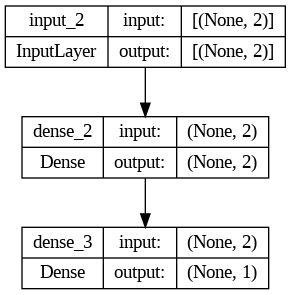

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)